In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

co2_df = pd.read_csv('/Users/chaotzuchieh/Desktop/CAP5771_Project/Data/New_CO2_emission_by_countries.csv')
energy_df = pd.read_csv('/Users/chaotzuchieh/Desktop/CAP5771_Project/Data/New_global_data_on_sustainable_energy.csv')
exchange_df = pd.read_csv('/Users/chaotzuchieh/Desktop/CAP5771_Project/Data/New_G20_Exchange_Rates.csv')

# Merge datasets using inner join
# First merge CO2 and energy data
merged_df = pd.merge(
    co2_df,
    energy_df,
    how='inner',
    on=['Country', 'Year']
)

# Then merge with exchange rate data
final_df = pd.merge(
    merged_df,
    exchange_df.rename(columns={'Value': 'Exchange_Rate'}),
    how='inner',
    on=['Country', 'Year']
)


In [2]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Country                                             357 non-null    object 
 1   Year                                                357 non-null    int64  
 2   CO2 emission (Tons)                                 357 non-null    float64
 3   Population(2022)                                    357 non-null    float64
 4   Area(Square kilometre)                              357 non-null    float64
 5   proportion of global land area                      357 non-null    float64
 6   Density(Square kilometre)_x                         357 non-null    int64  
 7   Access to electricity (% of population)             357 non-null    float64
 8   Access to clean fuels for cooking                   357 non-null    float64
 9  

In [3]:
final_df.head()

,Country,Year,CO2 emission (Tons),Population(2022),Area(Square kilometre),proportion of global land area,Density(Square kilometre)_x,Access to electricity (% of population),Access to clean fuels for cooking,Electricity from fossil fuels (TWh),...,Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(Square kilometre)_y,Land Area(Km2),Latitude,Longitude,Exchange_Rate
0,Argentina,2000,4.979455e+09,45510318.0,2780400.0,0.018,16,95.783290,95.00,50.37,...,40.914955,18849.810,12.283858,-0.788999,7708.099115,17.0,2780400.0,-38.416097,-63.616672,0.999500
1,Argentina,2001,5.113459e+09,45510318.0,2780400.0,0.018,16,95.511060,95.60,42.91,...,50.387330,18210.120,15.937488,-4.408840,7208.373114,17.0,2780400.0,-38.416097,-63.616672,0.999500
2,Argentina,2002,5.237851e+09,45510318.0,2780400.0,0.018,16,96.228870,96.10,39.70,...,51.078250,17275.256,16.249306,-10.894485,2593.404563,17.0,2780400.0,-38.416097,-63.616672,3.063257
3,Argentina,2003,5.372482e+09,45510318.0,2780400.0,0.018,16,96.442635,96.45,46.73,...,46.982075,18326.521,14.408259,8.837041,3349.806300,17.0,2780400.0,-38.416097,-63.616672,2.900629
4,Argentina,2004,5.529525e+09,45510318.0,2780400.0,0.018,16,96.653500,97.20,57.35,...,40.066883,19261.457,12.185576,9.029573,4277.721573,17.0,2780400.0,-38.416097,-63.616672,2.923301


In [4]:
final_df.columns

Index(['Country', 'Year', 'CO2 emission (Tons)', 'Population(2022)',
       'Area(Square kilometre)', 'proportion of global land area',
       'Density(Square kilometre)_x',
       'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Electricity from fossil fuels (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density(Square kilometre)_y', 'Land Area(Km2)',
       'Latitude', 'Longitude', 'Exchange_Rate'],
      dtype='object')

In [5]:
#Create new analytical features
final_df['CO2_per_capita'] = final_df['CO2 emission (Tons)'] / final_df['Population(2022)']
final_df['Energy_per_CO2'] = final_df['Primary energy consumption per capita (kWh/person)'] / final_df['CO2_per_capita']
final_df['Renewable_ratio'] = final_df['Electricity from renewables (TWh)'] / (final_df['Electricity from fossil fuels (TWh)'] + final_df['Electricity from renewables (TWh)'])

In [6]:
final_df.columns

Index(['Country', 'Year', 'CO2 emission (Tons)', 'Population(2022)',
       'Area(Square kilometre)', 'proportion of global land area',
       'Density(Square kilometre)_x',
       'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Electricity from fossil fuels (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density(Square kilometre)_y', 'Land Area(Km2)',
       'Latitude', 'Longitude', 'Exchange_Rate', 'CO2_per_capita',
       'Energy_per_CO2', 'Renewable_ratio'],
      dtype='object')

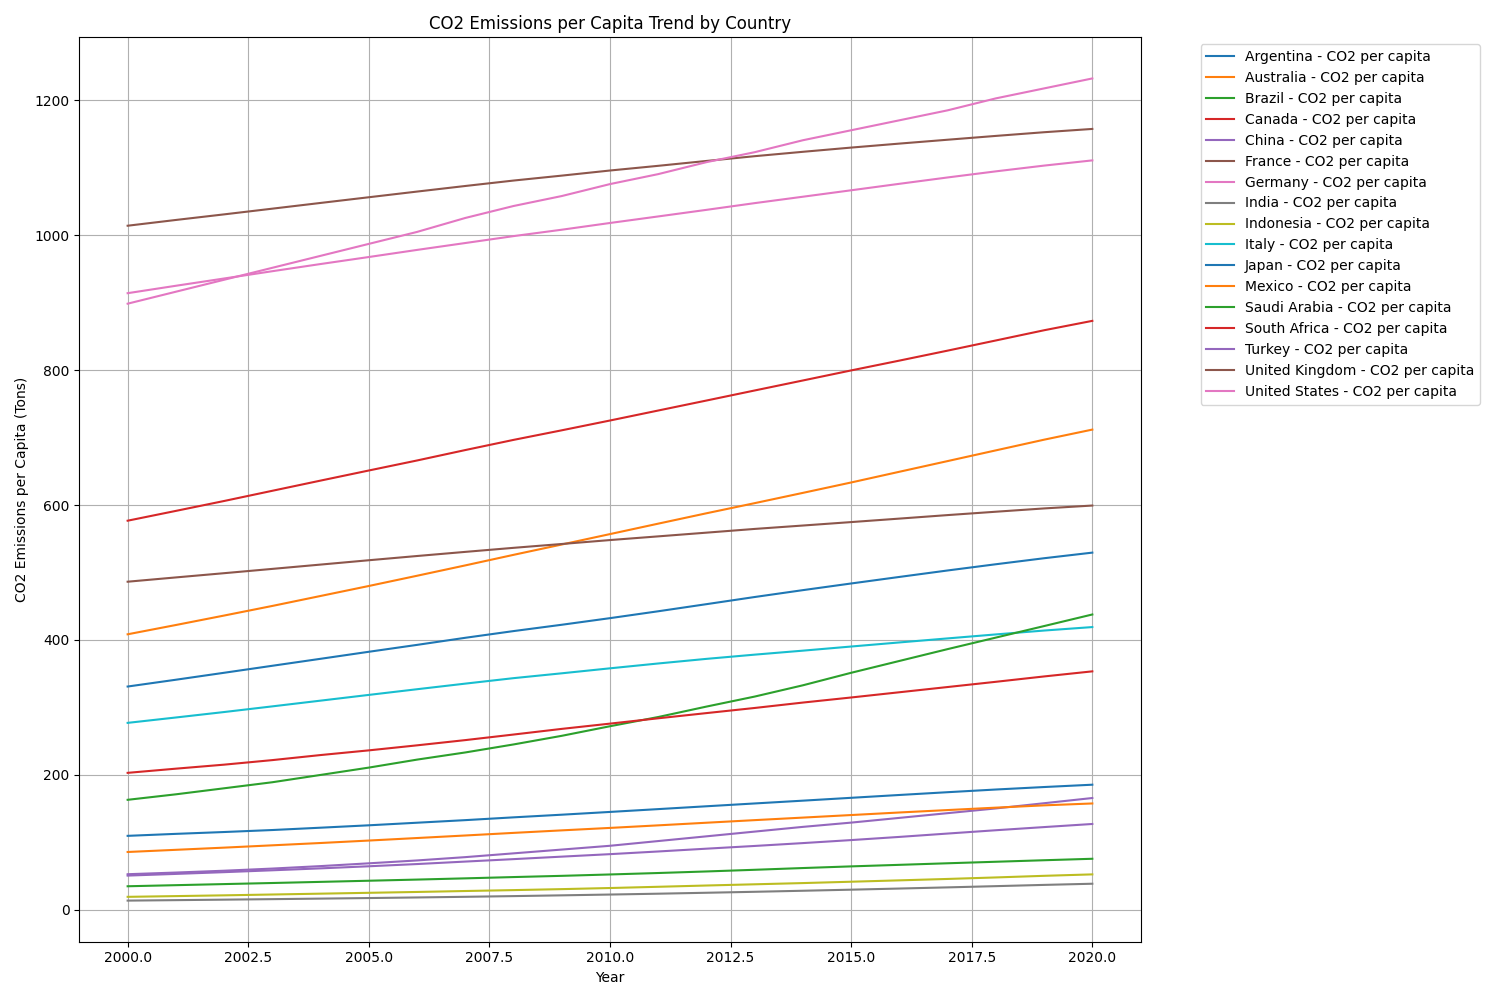

In [7]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib widget
!pip install mplcursors
!pip install ipympl

#  Multi-indicator time trend analysis
plt.figure(figsize=(15, 10))
lines = []
for country in final_df['Country'].unique():
    data = final_df[final_df['Country'] == country]
    line, = plt.plot(data['Year'], data['CO2_per_capita'], label=f'{country} - CO2 per capita')
    lines.append(line)

plt.title('CO2 Emissions per Capita Trend by Country')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita (Tons)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 添加互動式標籤
cursor = mplcursors.cursor(lines, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

plt.show()

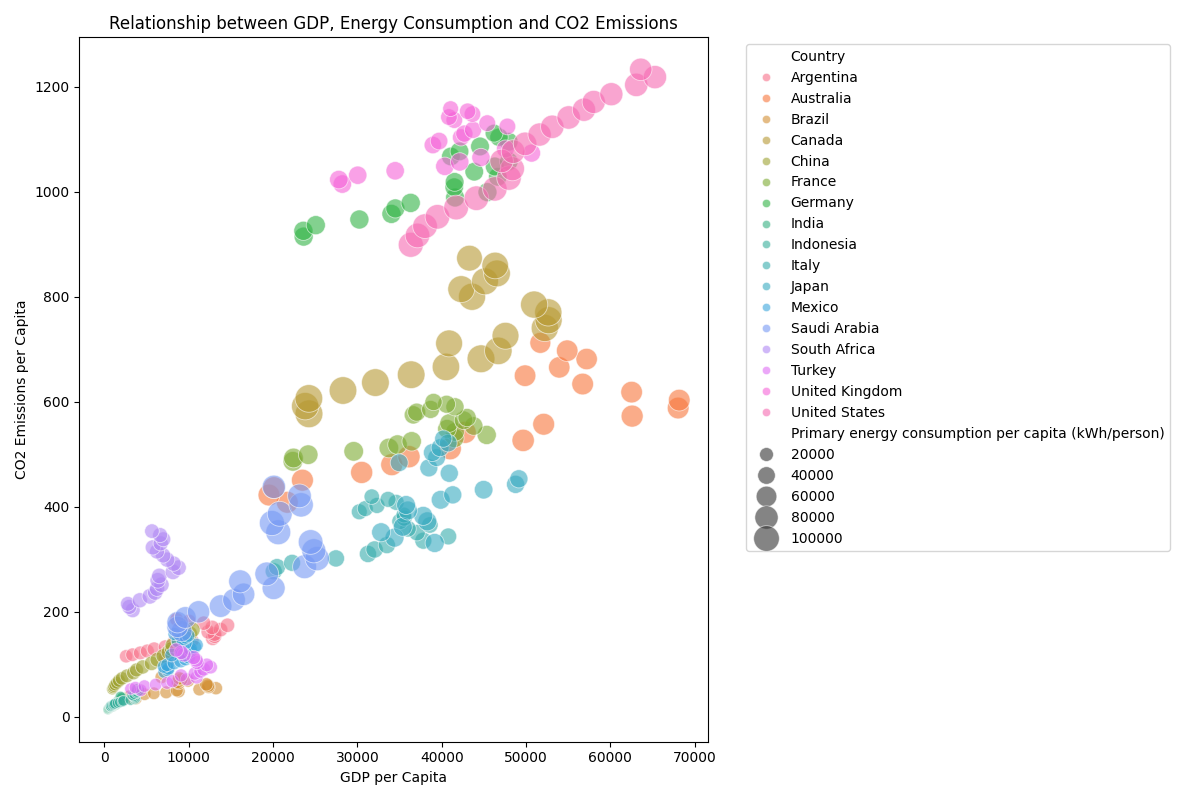

In [8]:
# GDP vs CO2 emissions matrix plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=final_df,
    x='gdp_per_capita',
    y='CO2_per_capita',
    hue='Country',
    size='Primary energy consumption per capita (kWh/person)',
    sizes=(50, 400),
    alpha=0.6
)
plt.title('Relationship between GDP, Energy Consumption and CO2 Emissions')
plt.xlabel('GDP per Capita')
plt.ylabel('CO2 Emissions per Capita')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


cursor = mplcursors.cursor(scatter, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"Country: {final_df.iloc[sel.index]['Country']}\n"
    f"Year: {final_df.iloc[sel.index]['Year']}\n"
    f"GDP per Capita: {sel.target[0]:.2f}\n"
    f"CO2 Emissions per Capita: {sel.target[1]:.2f}\n"
    f"Energy Consumption per Capita: {final_df.iloc[sel.index]['Primary energy consumption per capita (kWh/person)']:.2f}"
))

plt.show()

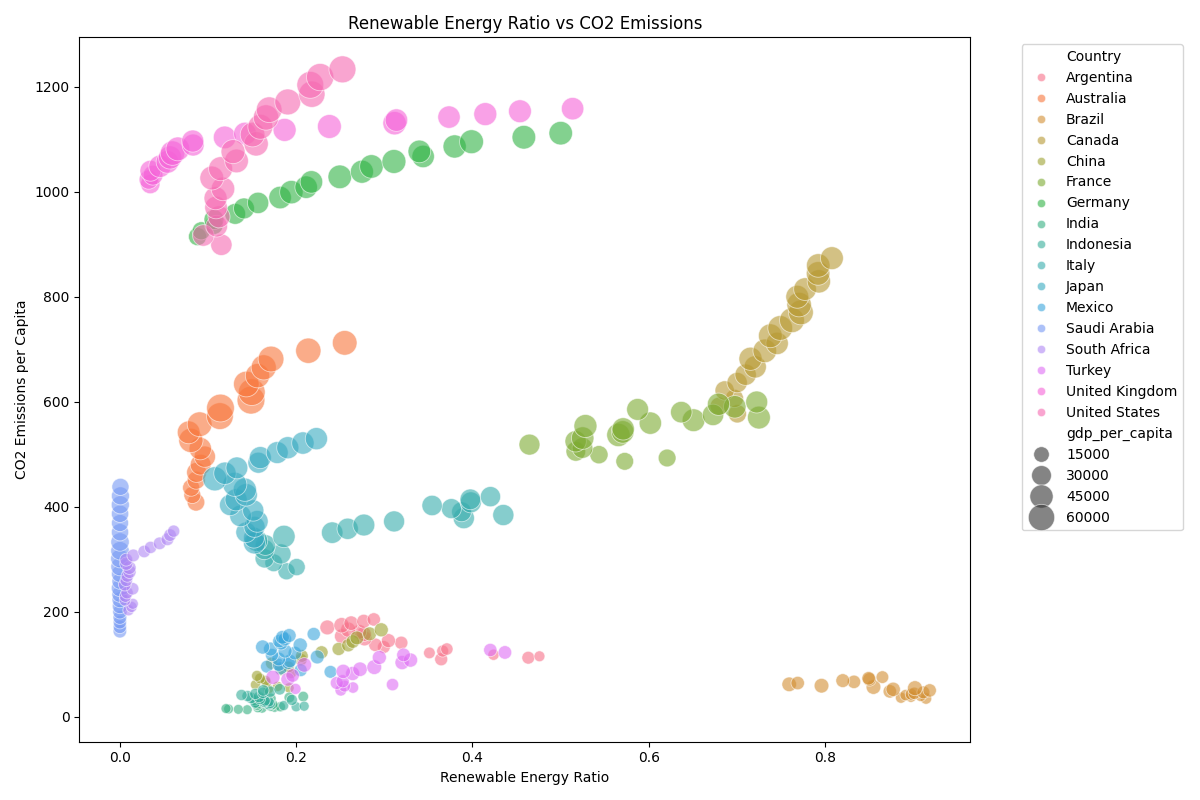

In [9]:

# Renewable energy vs CO2 emissions
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=final_df,
    x='Renewable_ratio',
    y='CO2_per_capita',
    hue='Country',
    size='gdp_per_capita',
    sizes=(50, 400),
    alpha=0.6
)
plt.title('Renewable Energy Ratio vs CO2 Emissions')
plt.xlabel('Renewable Energy Ratio')
plt.ylabel('CO2 Emissions per Capita')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 添加互動式標籤
cursor = mplcursors.cursor(scatter, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"Country: {final_df.iloc[sel.index]['Country']}\n"
    f"Year: {final_df.iloc[sel.index]['Year']}\n"
    f"Renewable Energy Ratio: {sel.target[0]:.2f}\n"
    f"CO2 Emissions per Capita: {sel.target[1]:.2f}\n"
    f"GDP per Capita: {final_df.iloc[sel.index]['gdp_per_capita']:.2f}"
))

plt.show()

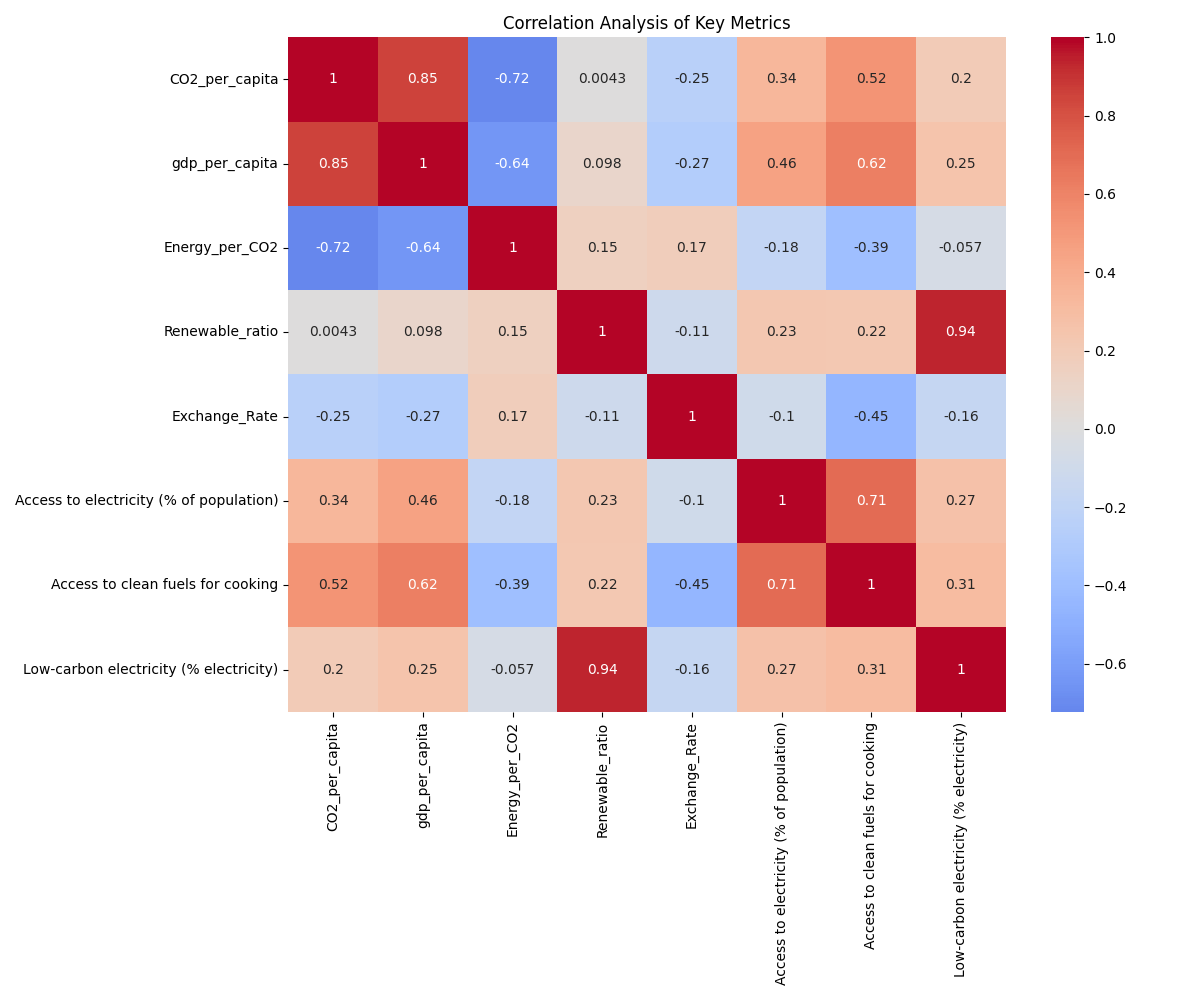

In [10]:
# Figure 4: Correlation heatmap
correlation_columns = [
    'CO2_per_capita', 
    'gdp_per_capita',
    'Energy_per_CO2',
    'Renewable_ratio',
    'Exchange_Rate',
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Low-carbon electricity (% electricity)'
]

correlation_matrix = final_df[correlation_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Analysis of Key Metrics')
plt.tight_layout()
plt.show()

In [11]:
final_df.head()

,Country,Year,CO2 emission (Tons),Population(2022),Area(Square kilometre),proportion of global land area,Density(Square kilometre)_x,Access to electricity (% of population),Access to clean fuels for cooking,Electricity from fossil fuels (TWh),...,gdp_growth,gdp_per_capita,Density(Square kilometre)_y,Land Area(Km2),Latitude,Longitude,Exchange_Rate,CO2_per_capita,Energy_per_CO2,Renewable_ratio
0,Argentina,2000,4.979455e+09,45510318.0,2780400.0,0.018,16,95.783290,95.00,50.37,...,-0.788999,7708.099115,17.0,2780400.0,-38.416097,-63.616672,0.999500,109.413755,172.280076,0.364497
1,Argentina,2001,5.113459e+09,45510318.0,2780400.0,0.018,16,95.511060,95.60,42.91,...,-4.408840,7208.373114,17.0,2780400.0,-38.416097,-63.616672,0.999500,112.358229,162.071975,0.463290
2,Argentina,2002,5.237851e+09,45510318.0,2780400.0,0.018,16,96.228870,96.10,39.70,...,-10.894485,2593.404563,17.0,2780400.0,-38.416097,-63.616672,3.063257,115.091507,150.100181,0.475977
3,Argentina,2003,5.372482e+09,45510318.0,2780400.0,0.018,16,96.442635,96.45,46.73,...,8.837041,3349.806300,17.0,2780400.0,-38.416097,-63.616672,2.900629,118.049759,155.244036,0.423869
4,Argentina,2004,5.529525e+09,45510318.0,2780400.0,0.018,16,96.653500,97.20,57.35,...,9.029573,4277.721573,17.0,2780400.0,-38.416097,-63.616672,2.923301,121.500479,158.529885,0.351098
